In [15]:
import pandas as pd
import requests
from collections import defaultdict
import matplotlib.pyplot as plt

# RSV Vaccine Disparities Among Pregnant Women

Respiratory Synctial Virus (RSV) is a common respiratory virus that causes mild, cold-like symptoms by infecting the nose, throat, and lungs. Infants and older adults are more likely to develop the infection, and some severe cases require hospitalization. 

The RSV vaccine is important in pregnant women because it provides protection for babies against severe RSV infection. This dataset looks at weekly RSV vaccination coverage among pregnant women of different races and ethnicities. From this data, we can find answers to the following questions:

- Are there specific racial disparities in weekly RSV vaccination coverage rates among pregnant women?
- At what weeks are these disparities most pronounced?
- What does the weekly RSV vaccination coverage rates in pregnant women of different racial demographics look like over time?
- What does the race/ethnicity distribution look like during this period?

We will start this analysis by retrieving the [Weekly RSV coverage data](https://data.cdc.gov/Pregnancy-Vaccination/Weekly-Respiratory-Syncytial-Virus-RSV-Vaccination/g4jn-64pd/about_data) from data.cdc.gov. 

## Step 1: Get RSV Data

In [ ]:
data_url ="https://data.cdc.gov/resource/g4jn-64pd.json"
data_file = requests.get(data_url)
data_file = data_file.json()

[{'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'American Indian / Alaska Native, NH', 'cover_estimate': '0', 'denominator': '49', 'date_order': '1', 'race_order': '1', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Asian, NH', 'cover_estimate': '0', 'denominator': '2811', 'date_order': '1', 'race_order': '2', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Black, NH', 'cover_estimate': '0', 'denominator': '1265', 'date_order': '1', 'race_order': '3', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Hispanic/Latino', 'cover_estimate': '0', 'denominator': '6809', 'date_order': '1', 'race_order': '4', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Multiple/Other, NH', 'cover_estimate': '0', 'denominator': '714', 'date_order': '1', 'race_order': '5', 'figure_id': '1'}, {'week_ending_date': '2023-09-30T00:00:00.000', 'demographic': 'Na

## Step 2: Create DataFrame to Show Weekly Disparities

After we have our data, we will format the results as a DataFrame to make the creation of our first chart easier. 

"cover_estimate" is represented as the percentage of women who were vaccinated between 18-49. To answer our first research question, we want to see 3 main variables:
- The weeks where there were no vaccinated pregnant women
- The demographics of the women that did not get vaccinated
- The amount of women in each demographic that were not vaccinated

In [17]:
weekly_disparities_list = []
grouped_by_week = defaultdict(list)

for item in data_file:
    cover_estimate = float(item.get("cover_estimate"))
    if (cover_estimate) == 0:
        weekly_disparities_list.append({
                "week_ending_date": item.get("week_ending_date"),
                "demographic": item.get("demographic"),
                "num_pregnant_women": item.get("denominator")
            })
        
weekly_disparities_df =  pd.DataFrame(weekly_disparities_list)
weekly_disparities_df["week_ending_date"] = pd.to_datetime(weekly_disparities_df["week_ending_date"])
weekly_disparities_df.columns = ["Week_Ending_Date", "Demographics", "Num_Pregnant_Women"]
print(weekly_disparities_df)

   Week_Ending_Date                            Demographics Num_Pregnant_Women
0        2023-09-30     American Indian / Alaska Native, NH                 49
1        2023-09-30                               Asian, NH               2811
2        2023-09-30                               Black, NH               1265
3        2023-09-30                         Hispanic/Latino               6809
4        2023-09-30                      Multiple/Other, NH                714
5        2023-09-30  Native Hawaiian / Pacific Islander, NH                115
6        2023-09-30                                 Overall              18580
7        2023-09-30                                 Unknown                815
8        2023-09-30                               White, NH               6002
9        2023-10-07     American Indian / Alaska Native, NH                 58
10       2023-10-07                               Asian, NH               3214
11       2023-10-07                               Bl

## At what weeks are these disparities more pronouced?

To prepare the data for visualization, we clean the data by removing rows where the demographics are not explicitly stated, weeks are missing dates, and where the number of pregnant women is missing counts. 

We also force the Num_Pregnant_Women column to be a numeric data type in order to plot the count in the visualization below. 

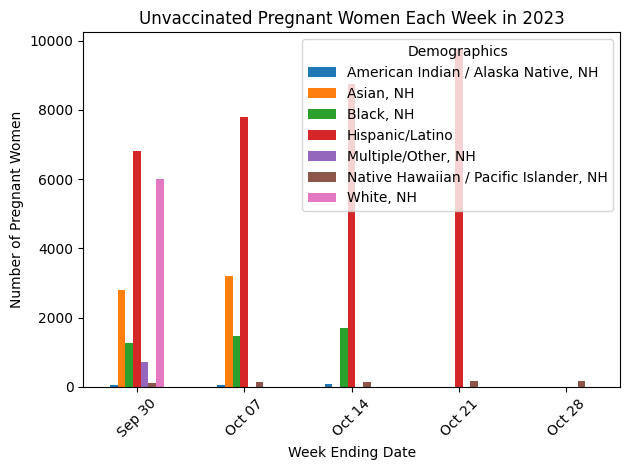

In [18]:
filtered_df = weekly_disparities_df[
    ~weekly_disparities_df["Demographics"].isin(["Overall", "Unknown"])
]

filtered_df = filtered_df.dropna(subset=["Week_Ending_Date", "Num_Pregnant_Women"])

filtered_df["Num_Pregnant_Women"] = pd.to_numeric(filtered_df["Num_Pregnant_Women"], errors="coerce")

pivot_df = filtered_df.pivot_table(
    index="Week_Ending_Date",
    columns="Demographics",
    values="Num_Pregnant_Women",
    aggfunc="sum"
)

pivot_df.index = pivot_df.index.strftime("%b %d")

ax = pivot_df.plot(kind="bar")
ax.set_title("Unvaccinated Pregnant Women Each Week in 2023")
ax.set_xlabel("Week Ending Date")
ax.set_ylabel("Number of Pregnant Women")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From this grouped bar chart, we see the weeks where there were no vaccinated pregnant women, and the demographics of those women. The highest demographic of women for all 5 weeks were Hispanic/Latino. Native Hawaiians/Pacific Islanders were the most consistent, with their demographic showing up across all 5 weeks, though their number was one of the smallest. 

## Step 3: Create DataFrame to Show Percentage of Vaccinated Pregnant Women Over Time

The next chart looks at racial/ethnic disparities over the entire time of the dataset. We prepare our data this time by creating a DataFrame with 3 variables in mind:
- Weeks
- Percentage of women vaccinated
- The racial and ethnic demographics of all the women included

In [19]:
disparities_over_time = []

for item in data_file:
    disparities_over_time.append({
        "week_ending_date": item.get("week_ending_date"),
        "percent_vaccinated": item.get("cover_estimate"),
        "demographic": item.get("demographic")
        })
disparities_over_time_df = pd.DataFrame(disparities_over_time)
disparities_over_time_df["week_ending_date"] = pd.to_datetime(disparities_over_time_df["week_ending_date"])
disparities_over_time_df.columns = ["Week_Ending_Date","Percent_Vaccinated", "Demographics"]
print(disparities_over_time_df)

    Week_Ending_Date Percent_Vaccinated  \
0         2023-09-30                  0   
1         2023-09-30                  0   
2         2023-09-30                  0   
3         2023-09-30                  0   
4         2023-09-30                  0   
..               ...                ...   
166       2024-02-03               17.9   
167       2024-02-03               16.9   
168       2024-02-03               17.8   
169       2024-02-03               12.6   
170       2024-02-03               19.9   

                               Demographics  
0       American Indian / Alaska Native, NH  
1                                 Asian, NH  
2                                 Black, NH  
3                           Hispanic/Latino  
4                        Multiple/Other, NH  
..                                      ...  
166                      Multiple/Other, NH  
167  Native Hawaiian / Pacific Islander, NH  
168                                 Overall  
169                    

## What does the weekly RSV vaccination coverage rates in pregnant women of different racial demographics look like over time?

Our DataFrame data is cleaned to remove rows that do not contain usable information for our analysis. Each demographic is plotted in the line graph below at the corresponding weeks. 

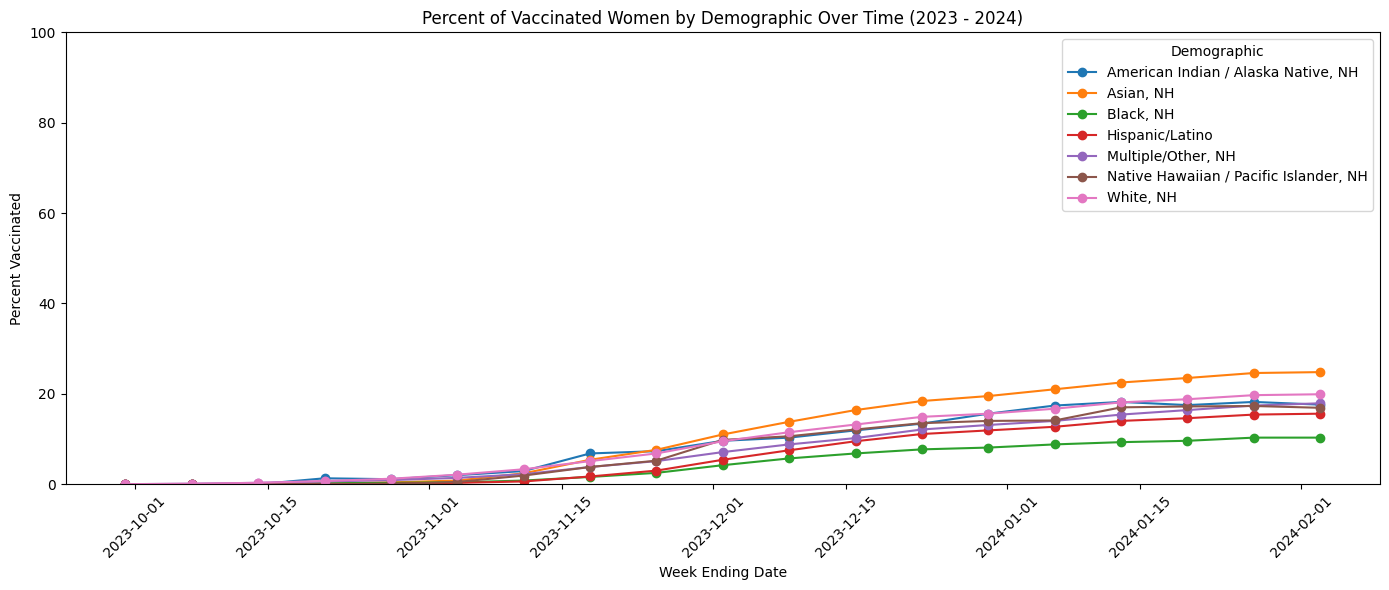

In [20]:

filtered_df = disparities_over_time_df[
    ~disparities_over_time_df["Demographics"].isin(["Overall", "Unknown"])
]

filtered_df = filtered_df.dropna(subset=["Week_Ending_Date", "Percent_Vaccinated"])

filtered_df["Percent_Vaccinated"] = pd.to_numeric(filtered_df["Percent_Vaccinated"], errors="coerce")

pivot_df = filtered_df.pivot_table(
    index="Week_Ending_Date",
    columns="Demographics",
    values="Percent_Vaccinated",
    aggfunc="mean"
)

plt.figure(figsize=(14, 6))

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker="o", label=column)

pivot_df.index = pivot_df.index.strftime("%b %d")

plt.title("Percent of Vaccinated Women by Demographic Over Time (2023 - 2024)")
plt.xlabel("Week Ending Date")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Demographic")
plt.tight_layout()
plt.show()


By Febrary 1st, 2024, the most vaccinated demographic of pregnant women was Asian, and the least vaccinated group were Black. According to the CDC Guidelines, it is most recommended for women to vaccinated for RSV during fall and winter months. This could explain the spike of vaccinations in all pregnant women starting from November 1st, 2023 onwards. 

## What does the race/ethnicity distribution look like during this period?

To answer this question, a piechart is created to compare the percentages of each racial distribution included in this study. 

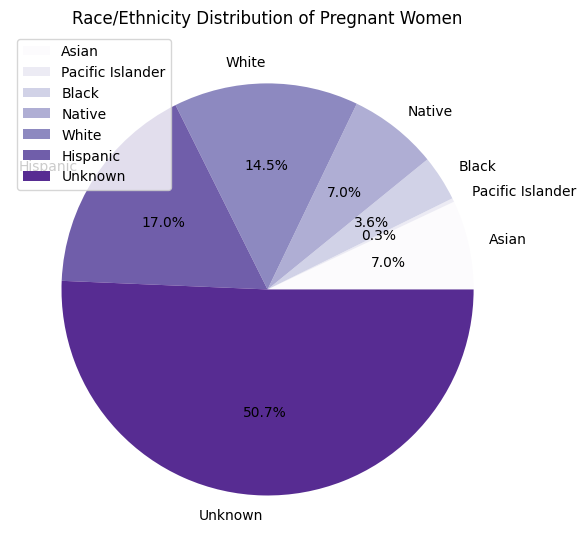

In [21]:
asian = []
pacific_island = []
black = []
native = []
white = []
hispanic = []
unknown = []
    
for item in data_file:
    race = item.get("demographic")
    num_women = int(item.get("denominator"))
    match race:
        case _ if race.startswith("Black"):
            black.append(num_women)
        case _ if race.startswith("American"):
            native.append(num_women)
        case _ if race.startswith("Asian"):
            asian.append(num_women)
        case _ if race.startswith("Hispanic"):
            hispanic.append(num_women)
        case _ if race.startswith("White"):
            white.append(num_women)
        case _ if race.startswith("Native"):
            pacific_island.append(num_women)
        case _:
            unknown.append(num_women)

total = sum(asian) + sum(black) + sum(native) + sum(white) + sum(hispanic) + sum(unknown)

race_results = {
    "Asian": sum(asian)/total *100,
    "Pacific Islander": sum(pacific_island)/total *100,
    "Black": sum(black)/total *100,
    "Native": sum(asian)/total *100,
    "White":sum(white)/total *100,
    "Hispanic": sum(hispanic)/total *100,
    "Unknown": sum(unknown)/total *100
}

race_results_df = pd.DataFrame.from_dict(race_results, orient="index", columns = ["Count"])

cmap = plt.cm.Purples  
colors = [cmap(i / len(race_results_df.index)) for i in range(len(race_results_df.index))]

race_results_df.plot.pie(y="Count", labels=race_results_df.index, figsize=(6,6), colors=colors, autopct='%1.1f%%',)
plt.title("Race/Ethnicity Distribution of Pregnant Women")
plt.ylabel("")
plt.tight_layout()
plt.show()

About 50% of women included in this study were of an unknown race/ethnic group. The highest demographic reported was Hispanic/Latino and the lowest were the Native Hawaiians/Pacific Islanders. 

## Are there specific racial disparities in weekly RSV vaccination coverage rates among pregnant women?

- The visualizations reveal notable differences in RSV vaccination rates among pregnant women across racial and ethnic groups. While these disparities may suggest unequal treatment, it is important to consider the underlying population distribution in this study. 

- For example, Hispanic/Latino pregnant women had the highest percentage of unvaccinated individuals for four consecutive weeks; however, they also represent the largest demographic group in the study, which may influence these findings. Similarly, White women had the second-highest unvaccinated rates and were nearly tied with Hispanic women in the first week. 

- Over time, Asian and White women consistently showed the highest vaccination rates, while Black and Hispanic women had the lowest. These trends highlight potential disparities, but further analysis is needed to determine whether the differences reflect inequitable access or other demographic factors.